In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reading data
P_0 = np.load("/home/analogicalnexus/chethan/MEG-scripts/-2-1_sec/-2-1.npy")
P_1 = np.load("/home/analogicalnexus/chethan/MEG-scripts/0_5-3_5_sec/0_5-3_5.npy")
P_2 = np.load("/home/analogicalnexus/chethan/MEG-scripts/3-6_sec/3-6.npy")
P_3 = np.load("/home/analogicalnexus/chethan/MEG-scripts/5-8_sec/5-8.npy")
P_4 = np.load("/home/analogicalnexus/chethan/MEG-scripts/7-10_sec/7_5-10_5.npy")
P_5 = np.load("/home/analogicalnexus/chethan/MEG-scripts/10-12_5_sec/10-12_5.npy")

In [3]:
X = np.concatenate((P_0[:,0:1250],P_1[:,0:1250],P_2[:,0:1000],P_3[:,0:1250],P_4[:,0:1250],P_5), axis=1)

In [4]:
# range(5,12,0.002)

In [5]:
X.shape

(6, 7002)

In [6]:
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')



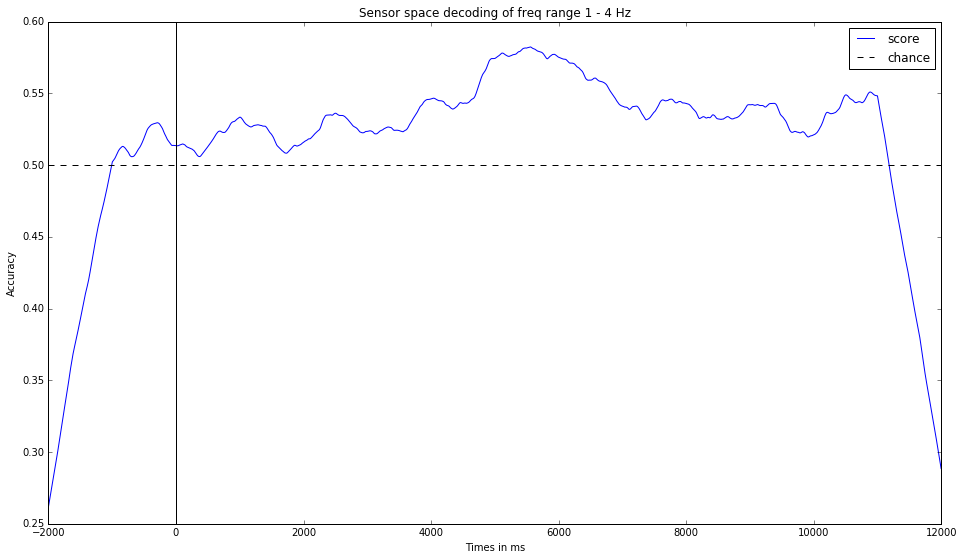

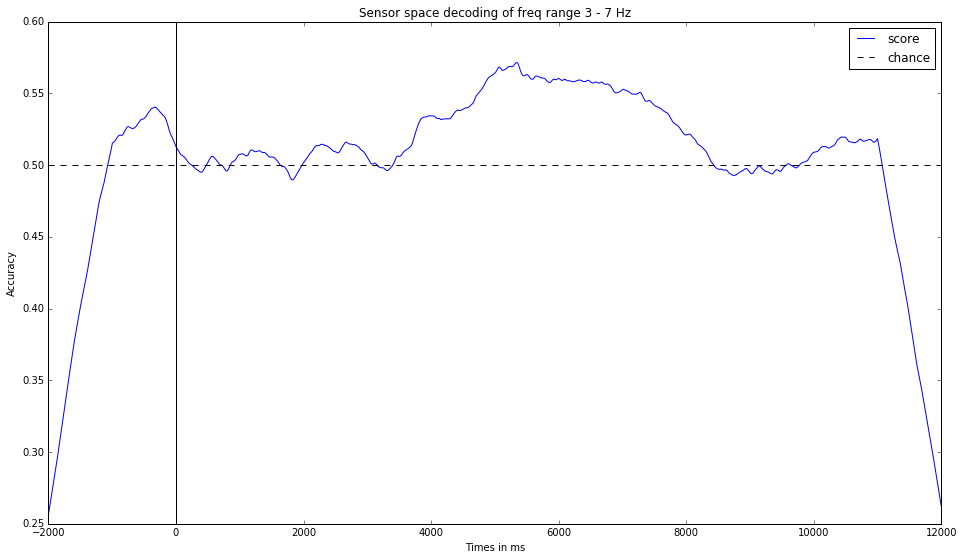

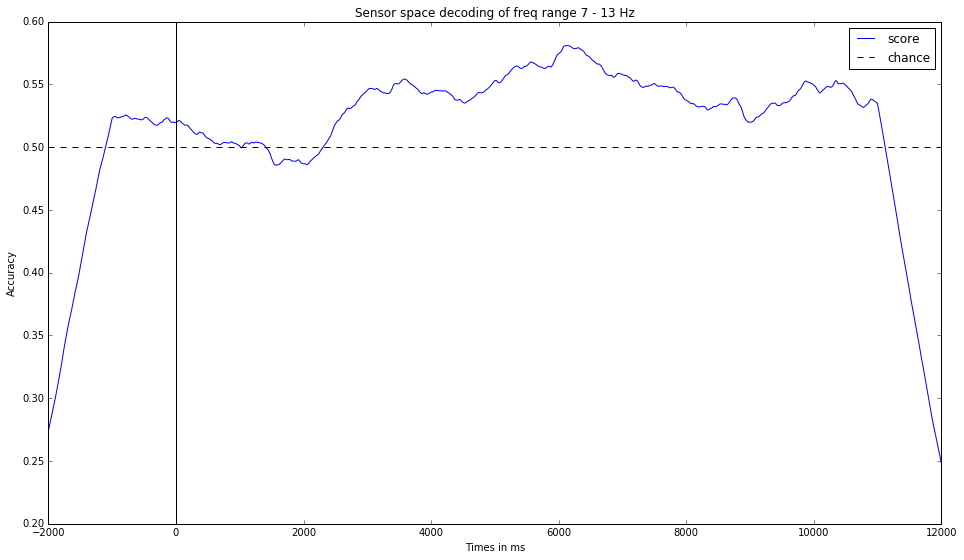

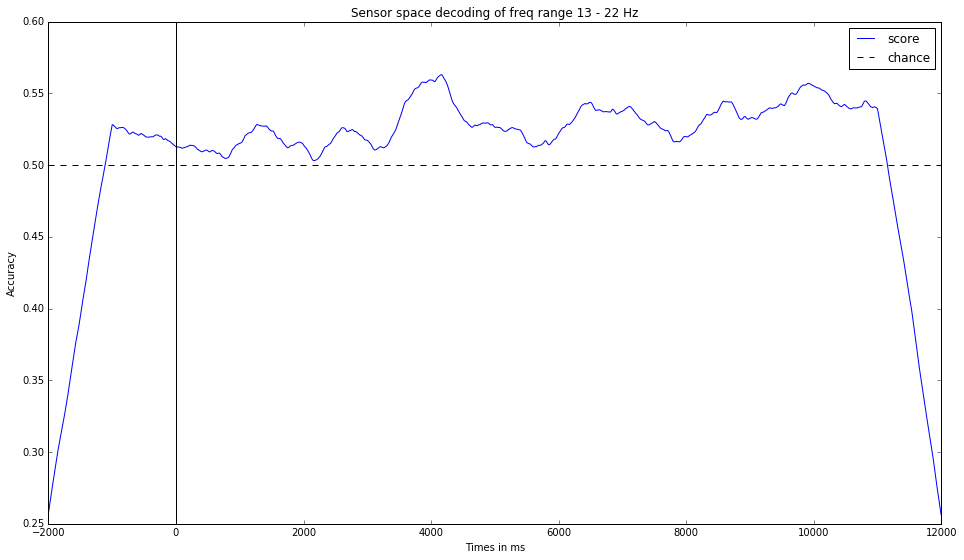

In [10]:
freqs = np.array([[1,4],[3,7],[7,13],[13,22],[40,61],[70,141]])
for i in range(4):
    # Plot
#     plt.subplots(1,2, gridspec_kw = {'width_ratios':[3, 1]})
#     fig, ax = plt.subplots( gridspec_kw = {'height_ratios':[5, 10]})
    X_av = []
    X_av = movingaverage(X[i,:7000], 1000)
    fig, ax = plt.subplots()
    plt.rcParams["figure.figsize"] = [16,9]
    ax.plot(range(-2000,12000,2), X_av, label='score')
    ax.axhline(.5, color='k', linestyle='--', label='chance')
    ax.set_xlabel('Times in ms')
    ax.set_ylabel('Accuracy')  # Area Under the Curve
    ax.legend()
    ax.axvline(.0, color='k', linestyle='-')
#     (r'Histogram of IQ: $\mu=100$, $\sigma=15$'
    ax.set_title('Sensor space decoding of freq range %s - %s Hz'%(freqs[i,0], freqs[i,1]))
    plt.show()
    fig.savefig('%s-%sHz.png'%(freqs[i,0], freqs[i,1]))


In [8]:
fig.savefig('myfig.png')

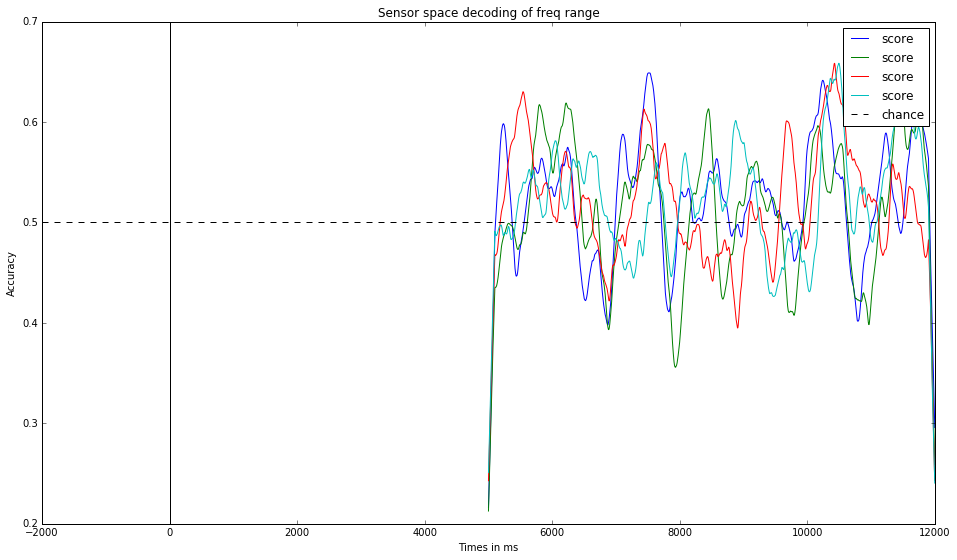

In [9]:
freqs = np.array([[1,4],[3,7],[7,13],[13,22],[40,61],[70,141]])
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [16,9]
for i in range(4):
    # Plot
#     plt.subplots(1,2, gridspec_kw = {'width_ratios':[3, 1]})
#     fig, ax = plt.subplots( gridspec_kw = {'height_ratios':[5, 10]})
    X_av = []
    X_av = movingaverage(X[i,:3500], 100)
    ax.plot(range(5000,12000,2), X_av, label='score')
    
ax.axhline(.5, color='k', linestyle='--', label='chance')
ax.set_xlabel('Times in ms')
ax.set_ylabel('Accuracy')  # Area Under the Curve
ax.legend()
ax.axvline(.0, color='k', linestyle='-')
#     (r'Histogram of IQ: $\mu=100$, $\sigma=15$'
ax.set_title('Sensor space decoding of freq range')
plt.show()